In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Rectangle, Circle
from scipy.spatial.distance import euclidean
# %matplotlib notebook
%matplotlib widget

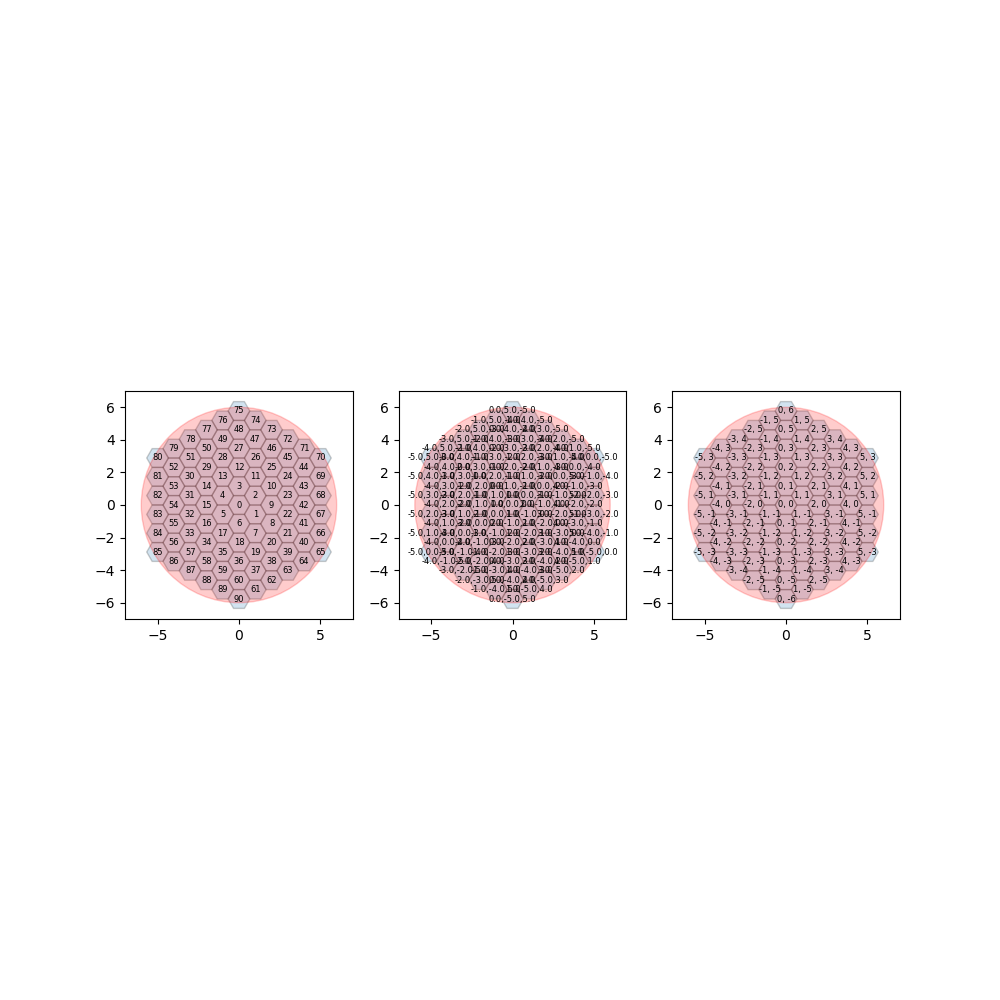

In [89]:
class HexGrid(object):
    def __init__(self, radius, d):
        # self.d = (2/np.sqrt(3)) * d
        self.d = d
        self.hex_rad =  2./3. * self.d
        # self.hex_rad = 1
        self.deltas = [[1, 0, -1], [0, 1, -1], [-1, 1, 0], [-1, 0, 1], [0, -1, 1], [1, -1, 0]]
        self.deltas = self.d * np.array(self.deltas)
        self.radius = radius
        self.cube_coords = {0: (0, 0, 0)}
        self.edge_states = []
        state = 1
        for r in range(radius):
            a = 0
            b = -r/self.d
            c = +r/self.d
            for j in range(6):
                num_of_hexes_in_edge = int(np.ceil(r/self.d))
                for i in range(num_of_hexes_in_edge):
                    a = a + self.deltas[j][0]
                    b = b + self.deltas[j][1]
                    c = c + self.deltas[j][2]
                    self.cube_coords[state] = (a, b, c)
                    if r == radius - 1:
                        self.edge_states.append(state)
                    state += 1

        self.cart_coords = {state: self.to_cartesian(coord, self.hex_rad) for state, coord in self.cube_coords.items()}
        self.size = len(self.cube_coords)

    def get_adjacency(self):
        adjacency_matrix = np.zeros((len(self.cube_coords), len(self.cube_coords)))
        for state, coord in self.cube_coords.items():
            for d in self.deltas:
                a = coord[0] + d[0]
                b = coord[1] + d[1]
                c = coord[2] + d[2]
                neighbour = self.get_state_id((a, b, c))
                if neighbour is not None:
                    adjacency_matrix[state, neighbour] = 1
        return adjacency_matrix

    def get_sas_transition_mat(self):
        """Fill and return the state by action by state transition matrix.

        :return:
        """
        sas_matrix = np.zeros((len(self.cube_coords), len(self.deltas), len(self.cube_coords)))
        for state, coord in self.cube_coords.items():
            for i, d in enumerate(self.deltas):
                a = coord[0] + d[0]
                b = coord[1] + d[1]
                c = coord[2] + d[2]
                neighbour = self.get_state_id((a, b, c))
                if neighbour is not None:
                    sas_matrix[state, i, neighbour] = 1.
                else:  # if a wall state is the neighbour
                    sas_matrix[state, i, state] = 1.
        return sas_matrix

    def get_state_id(self, cube_coordinate):
        for state, loc in self.cube_coords.items():
            if loc == cube_coordinate:
                return state
        return None

    def is_state_location(self, coordinate):
        """Return true if cube coordinate exists.

        :param coordinate: Tuple cube coordinate
        :return:
        """
        for state, loc in self.cube_coords.items():
            if loc == coordinate:
                return True
        return False

    @staticmethod
    def to_cartesian(coordinate, hex_rad):
        # xcoord = coordinate[0]* hex_rad
        xcoord = coordinate[0] 
        ycoord = hex_rad * np.sin(np.radians(60)) * (coordinate[1] - coordinate[2]) 
        # ycoord = hex_rad * np.sin(np.radians(60)) * (coordinate[1] - coordinate[2]) 
        return xcoord, ycoord

    def show_grid(self, ax=None, show_tile=None):
        if ax is None:
            fig, ax = plt.subplots()
        else:
            plt.sca(ax)
        ax.set_aspect('equal')
        for i, (x, y) in self.cart_coords.items():
            hex_patch = RegularPolygon((x, y), numVertices=6, radius=self.hex_rad,
                                       orientation=np.radians(30), alpha=0.2, edgecolor='k')
            ax.add_patch(hex_patch)
            if show_tile == 'number':
                plt.text(x, y, i, ha='center', va='center', fontsize=6)
            elif show_tile == 'cube':
                a, b, c = self.cube_coords[i]
                s = '{:.1f},{:.1f},{:.1f}'.format(a, b, c)
                plt.text(x, y, s, ha='center', va='center', fontsize=6)
            elif show_tile == 'cartesian':
                s = '{:.0f}, {:.0f}'.format(x, y)
                plt.text(x, y, s, ha='center', va='center', fontsize=6)
            else:
                pass

        lower_bound = min(min(self.cart_coords.values()))
        upper_bound = max(max(self.cart_coords.values()))
        plt.xlim([lower_bound - 2, upper_bound + 2])
        plt.ylim([lower_bound - 2, upper_bound + 2])
        return ax

    def distance(self, state_a, state_b):
        return euclidean(self.cart_coords[state_a], self.cart_coords[state_b])

radius = 6
d = 1
g = HexGrid(radius, d)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))


g.show_grid(ax1, 'number')
ax1.add_patch(plt.Circle((0, 0), radius, color='r', alpha=0.2))
g.show_grid(ax2, 'cube')
ax2.add_patch(plt.Circle((0, 0), radius, color='r', alpha=0.2))
g.show_grid(ax3, 'cartesian')
ax3.add_patch(plt.Circle((0, 0), radius, color='r', alpha=0.2))



In [56]:
print(np.radians(60))
print(np.pi / 3)

1.0471975511965976
1.0471975511965976


In [69]:
2 / np.sqrt(3)
2/3

0.6666666666666666

SyntaxError: unexpected EOF while parsing (3850361998.py, line 1)